<a href="https://colab.research.google.com/github/vinothrajkumar05/chennai-house-price-prediction/blob/main/Chennai_House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the nesscessary packages

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset


In [2]:
df=pd.read_csv("/content/train-chennai-sale.csv")

Printing the 1st 5 rows of loaded dataset

In [3]:
df.head()


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


Finding out no. of rows & no. of columns

In [4]:
df.shape

(7109, 22)

Finding out the datatype of each columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Data Cleaning
Finding out the no. of null values in each columns

In [6]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Finding the unique values in the N_BEDROOM column

In [7]:
df.N_BEDROOM.unique()

array([ 1.,  2.,  3.,  4., nan])

Since the N_BEDROOM column has discrete values, so that I have taken the mode of that column to replace the null value in this column

In [8]:
n_bedroom_mode = df['N_BEDROOM'].mode()[0]
print("Mode of N_BEDROOM column : "+str(n_bedroom_mode))

Mode of N_BEDROOM column : 1.0


**Replacing the null value with the mode value**

In [9]:
df["N_BEDROOM"].fillna(n_bedroom_mode, inplace = True)

Finding the unique values in the N_BATHROOM column

In [10]:
df.N_BATHROOM.unique()

array([ 1.,  2., nan])

Since the N_BATHROOM column has discrete values, so that I have taken the mode of that column to replace the null value in this column

In [11]:
n_bathroom_mode = df['N_BATHROOM'].mode()[0]
print("Mode of N_BATHROOM column : "+str(n_bathroom_mode))

Mode of N_BATHROOM column : 1.0


Replacing the null value with the mode value

In [12]:
df["N_BATHROOM"].fillna(n_bathroom_mode, inplace = True)

**Finding the unique values in the QS_OVERALL column**

In [13]:
df.QS_OVERALL.unique()

array([4.33 , 3.765, 3.09 , 4.01 , 3.29 , 3.32 , 2.67 , 3.26 , 3.55 ,
       3.16 , 3.83 , 2.89 , 2.26 , 3.19 , 3.66 ,   nan, 3.57 , 4.3  ,
       3.35 , 4.76 , 3.39 , 3.43 , 3.73 , 3.59 , 3.74 , 2.29 , 3.17 ,
       4.18 , 2.755, 2.11 , 2.605, 4.58 , 4.2  , 3.27 , 4.19 , 2.98 ,
       3.12 , 3.08 , 3.85 , 3.42 , 3.2  , 4.   , 3.34 , 2.825, 3.46 ,
       4.07 , 3.68 , 2.95 , 3.505, 2.97 , 3.63 , 3.76 , 3.77 , 2.78 ,
       3.985, 3.04 , 2.88 , 4.21 , 2.42 , 3.8  , 2.54 , 3.84 , 2.395,
       3.14 , 2.49 , 3.175, 2.84 , 4.17 , 3.13 , 3.98 , 3.36 , 3.735,
       2.62 , 4.61 , 2.6  , 4.09 , 3.18 , 3.425, 3.71 , 3.21 , 3.61 ,
       2.9  , 3.94 , 4.145, 4.26 , 4.16 , 3.5  , 3.22 , 3.99 , 4.12 ,
       2.475, 2.28 , 2.725, 4.03 , 3.07 , 2.81 , 3.45 , 3.9  , 3.87 ,
       3.1  , 2.93 , 3.05 , 3.54 , 2.63 , 3.11 , 3.89 , 3.33 , 3.96 ,
       3.56 , 4.39 , 3.58 , 3.47 , 3.88 , 4.04 , 3.6  , 4.53 , 3.72 ,
       2.96 , 3.4  , 3.51 , 4.215, 3.055, 3.06 , 3.53 , 3.435, 3.41 ,
       3.86 , 3.62 ,

Since the QS_OVERALL column has continuous values, so that I have taken the mean of that column to replace the null value in this column

In [14]:
qs_overall_mean = df['QS_OVERALL'].mean()
print("Mean of QS_OVERALL column : "+str(qs_overall_mean))

Mean of QS_OVERALL column : 3.5032537884152384


Replacing the null value with the mode value

In [15]:
df["QS_OVERALL"].fillna(qs_overall_mean, inplace = True)

**Now the null values in all the columns have replaced with proper values**

In [16]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

Change the data type of N_BEDROOM & N_BATHROOM from float to int

In [17]:
df=df.astype({"N_BEDROOM":'int64',"N_BATHROOM":'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   int64  
 6   N_BATHROOM     7109 non-null   int64  
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

**Fetching the columns with object datatype**

In [18]:
df.dtypes[df.dtypes=="object"]

PRT_ID           object
AREA             object
DATE_SALE        object
SALE_COND        object
PARK_FACIL       object
DATE_BUILD       object
BUILDTYPE        object
UTILITY_AVAIL    object
STREET           object
MZZONE           object
dtype: object

Printing the unique values in the AREA column

In [19]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

Replacing the spelling mistakes in the AREA column

In [20]:
df['AREA'] = df['AREA'].replace({'Karapakam':'Karapakkam','Ann Nagar':'Anna Nagar','Ana Nagar':'Anna Nagar','Adyr':'Adayar',
                                 'Adyar':'Adayar','Velchery':'Velachery','Chrompt':'Chrompet','Chormpet':'Chrompet',
                                 'KKNagar':'KK Nagar','TNagar':'T Nagar','Chrmpet':'Chrompet'
                                })

**Printing the unique values in the AREA column after replacing the spelling mistakes**

In [21]:
df.AREA.unique()


array(['Karapakkam', 'Anna Nagar', 'Adayar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

**Replacing the spelling mistakes in the AREA column**

In [22]:
df['AREA'] = df['AREA'].replace({'Karapakam':'Karapakkam','Ann Nagar':'Anna Nagar','Ana Nagar':'Anna Nagar','Adyr':'Adayar',
                                 'Adyar':'Adayar','Velchery':'Velachery','Chrompt':'Chrompet','Chormpet':'Chrompet',
                                 'KKNagar':'KK Nagar','TNagar':'T Nagar','Chrmpet':'Chrompet'
                                })


Printing the unique values in the AREA column after replacing the spelling mistakes

In [23]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adayar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

Printing the unique values in the SALE_COND column

In [24]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

Replacing the spelling mistakes in the SALE_COND column

In [25]:
df['SALE_COND'] = df['SALE_COND'].replace({'Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial',
                                           'Adj Land':'AdjLand'})

Printing the unique values in the SALE_COND column after replacing the spelling mistakes

In [26]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

Printing the unique values in the PARK_FACIL column

In [27]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

**Replacing the spelling mistakes in the PARK_FACIL column**

In [28]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace({'Noo':'No'})

Printing the unique values in the PARK_FACIL column after replacing the spelling mistakes

In [29]:
df.PARK_FACIL.unique()


array(['Yes', 'No'], dtype=object)

**Printing the unique values in the BUILDTYPE column**

In [30]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

**Replacing the spelling mistakes in the BUILDTYPE column**

In [31]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'})

Printing the unique values in the BUILDTYPE column after replacing the spelling mistakes

In [32]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

Printing the unique values in the UTILITY_AVAIL column

In [33]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

**Replacing the spelling mistakes in the UTILITY_AVAIL column**

In [34]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({'All Pub':'AllPub','NoSewr ':'NoSeWa'})

Printing the unique values in the UTILITY_AVAIL column after replacing the spelling mistakes

In [35]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSeWa'], dtype=object)

**Printing the unique values in the STREET column**

In [36]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

Replacing the spelling mistakes in the STREET column

In [37]:
df['STREET'] = df['STREET'].replace({'Pavd':'Paved','No Access':'NoAccess'})

Printing the unique values in the STREET column after replacing the spelling mistakes

In [38]:
df.STREET.unique()


array(['Paved', 'Gravel', 'NoAccess'], dtype=object)

Printing the unique values in the MZZONE column

In [39]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

**Change the object data type of DATE_SALE column to datetime**

In [40]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
df['DATE_SALE']

0      2011-04-05
1      2006-12-19
2      2012-04-02
3      2010-03-13
4      2009-05-10
          ...    
7104   2011-03-01
7105   2004-08-04
7106   2006-08-25
7107   2009-03-08
7108   2005-07-13
Name: DATE_SALE, Length: 7109, dtype: datetime64[ns]

**Change the object data type of DATE_BUILD column to datetime**

In [41]:
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])
df['DATE_BUILD']

0      1967-05-15
1      1995-12-22
2      1992-09-02
3      1988-03-18
4      1979-10-13
          ...    
7104   1962-01-15
7105   1995-11-04
7106   1978-01-09
7107   1977-11-08
7108   1961-07-24
Name: DATE_BUILD, Length: 7109, dtype: datetime64[ns]

**Find out the age of the building**

In [42]:
df['House_age']=df['DATE_SALE'].dt.year-df['DATE_BUILD'].dt.year
df['House_age']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: House_age, Length: 7109, dtype: int64

Total price of the house (Registration fee, Commission, Sales Price) will added. This is consider as a target value

In [43]:
df['Target_Total_Price'] = df['REG_FEE']+df['COMMIS']+df['SALES_PRICE']
df['Target_Total_Price']

0        8124400
1       22781941
2       13672408
3       10063653
4        7717313
          ...   
7104     5668827
7105    11370222
7106     8835792
7107     9051448
7108    10405469
Name: Target_Total_Price, Length: 7109, dtype: int64

**Detecting the** **Outliers**

In [44]:
fig = px.box(df['House_age'], y="House_age")
fig.update_layout(title_text='House_age', title_x=0.5)
fig.show()


In [45]:
fig = px.box(df['INT_SQFT'], y="INT_SQFT")
fig.update_layout(title_text='INT_SQFT', title_x=0.5)
fig.show()

In [46]:
fig = px.box(df['DIST_MAINROAD'], y="DIST_MAINROAD")
fig.update_layout(title_text='DIST_MAINROAD', title_x=0.5)
fig.show()

**Data Encoding**

In [47]:
area = {'Karapakkam':0, 'Anna Nagar':1, 'Adayar':2, 'Velachery':3, 'Chrompet':4,'KK Nagar':5, 'T Nagar':6}
df['AREA'] = df.AREA.map(area)

In [48]:
sale_cond = {'AbNormal':0, 'Family':1, 'Partial':2, 'AdjLand':3, 'Normal Sale':4}
df['SALE_COND'] = df.SALE_COND.map(sale_cond)

In [49]:
utility_avail = {'AllPub':0, 'ELO':1, 'NoSeWa':2}
df['UTILITY_AVAIL'] = df.UTILITY_AVAIL.map(utility_avail)

In [50]:
street = {'Paved':0, 'Gravel':1, 'NoAccess':2}
df['STREET'] = df.STREET.map(street)

In [51]:
mzzone = {'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5}
df['MZZONE'] = df.MZZONE.map(mzzone)

In [52]:
buildtype = {'Commercial':0, 'Others':1, 'House':2}
df['BUILDTYPE'] = df.BUILDTYPE.map(buildtype)

In [53]:
park_facil = {'Yes':0,'No':1}
df['PARK_FACIL'] = df.PARK_FACIL.map(park_facil)

In [54]:
### Encoded columns

# 1) AREA --> {'Karapakkam':0, 'Anna Nagar':1, 'Adayar':2, 'Velachery':3, 'Chrompet':4,'KK Nagar':5, 'T Nagar':6}
# 2) SALE_COND --> {'AbNormal':0, 'Family':1, 'Partial':2, 'AdjLand':3, 'Normal Sale':4}
# 3) UTILITY_AVAIL --> {'AllPub':0, 'ELO':1, 'NoSeWa':2}
# 4) STREET --> {'Paved':0, 'Gravel':1, 'NoAccess':2}
# 5) MZZONE --> {'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5}
# 6) BUILDTYPE --> {'Commercial':0, 'Others':1, 'House':2}
# 7) PARK_FACIL --> {'Yes':0,'No':1}

In [55]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,House_age,Target_Total_Price
0,P03210,0,1004,2011-04-05,131,1,1,3,0,0,...,0,4.0,3.9,4.9,4.330,380000,144400,7600000,44,8124400
1,P09411,1,1986,2006-12-19,26,2,1,5,0,1,...,3,4.9,4.2,2.5,3.765,760122,304049,21717770,11,22781941
2,P01812,2,909,2012-04-02,70,1,1,3,0,0,...,4,4.1,3.8,2.2,3.090,421094,92114,13159200,20,13672408
3,P05346,3,1855,2010-03-13,14,3,2,5,1,1,...,2,4.7,3.9,3.6,4.010,356321,77042,9630290,22,10063653
4,P06210,0,1226,2009-05-10,84,1,1,3,0,0,...,1,3.0,2.5,4.1,3.290,237000,74063,7406250,30,7717313


**Drop the unwanted columns**

In [56]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'House_age', 'Target_Total_Price'],
      dtype='object')

In [57]:
df = df.drop(columns=['PRT_ID','DATE_SALE','DATE_BUILD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS',
                       'SALES_PRICE'])

In [58]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,House_age,Target_Total_Price
0,0,1004,131,1,1,3,0,0,0,0,0,0,44,8124400
1,1,1986,26,2,1,5,0,1,0,0,1,3,11,22781941
2,2,909,70,1,1,3,0,0,0,1,1,4,20,13672408
3,3,1855,14,3,2,5,1,1,1,2,0,2,22,10063653
4,0,1226,84,1,1,3,0,0,1,0,1,1,30,7717313


**Export the cleaned data into csv file**

In [59]:
df.to_csv('train_chennai_sale_clean.csv',index=False)

**Exploratory Data Analysis**

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA,7109.0,2.824307e+00,1.919876e+00,0.0,1.0,3.0,4.0,6.0
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.0,1373.0,1744.0,2500.0
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.0,99.0,148.0,200.0
N_BEDROOM,7109.0,1.636939e+00,8.028806e-01,1.0,1.0,1.0,2.0,4.0
N_BATHROOM,7109.0,1.213110e+00,4.095336e-01,1.0,1.0,1.0,1.0,2.0
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.0,4.0,4.0,6.0
SALE_COND,7109.0,2.008440e+00,1.412297e+00,0.0,1.0,2.0,3.0,4.0
PARK_FACIL,7109.0,4.954283e-01,5.000143e-01,0.0,0.0,0.0,1.0,1.0
BUILDTYPE,7109.0,1.016177e+00,8.192894e-01,0.0,0.0,1.0,2.0,2.0
UTILITY_AVAIL,7109.0,1.255029e+00,8.490977e-01,0.0,0.0,2.0,2.0,2.0


In [61]:
df[['INT_SQFT','DIST_MAINROAD','House_age','Target_Total_Price']].describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.0,1373.0,1744.0,2500.0
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.0,99.0,148.0,200.0
House_age,7109.0,2.427627e+01,1.233416e+01,3.0,14.0,23.0,34.0,55.0
Target_Total_Price,7109.0,1.141285e+07,3.944957e+06,2253935.0,8645792.0,10819531.0,13613927.0,24969043.0


In [62]:
temp_dict = {'AREA':['Karapakkam', 'Anna Nagar', 'Adayar', 'Velachery', 'Chrompet','KK Nagar', 'T Nagar'],
'SALE_COND':['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
'UTILITY_AVAIL':['AllPub', 'ELO', 'NoSeWa'],
'STREET':['Paved', 'Gravel', 'NoAccess'],
'MZZONE':['A','C','I','RH','RL','RM'],
'BUILDTYPE':['Commercial', 'Others', 'House'],
'PARK_FACIL':['Yes','No']}
temp_key = list(temp_dict)
temp_value = list(temp_dict.values())

In [63]:
for i in range(len(temp_dict)):
    x = pd.DataFrame(df.groupby(temp_key[i])['Target_Total_Price'].mean())
    y = temp_value[i]
    df1 = {temp_key[i]:y,'AVERAGE_PRICE':x['Target_Total_Price']}
    temp = pd.DataFrame(df1)
    temp.sort_values('AVERAGE_PRICE',inplace=True)

    fig1 = px.bar(temp,x=temp_key[i],y='AVERAGE_PRICE',color=temp_key[i],title=temp_key[i]+' vs AVERAGE_PRICE')
    fig1.update_layout(
        updatemenus=[
            dict(
                buttons=list([
                    dict(
                        args=["type", "bar"],
                        label="Bar Chart",
                        method="restyle"
                    ),
                    dict(
                        args=["type", "scatter"],
                        label="Scatter Plot",
                        method="restyle"
                    )
                ]),
                direction="down",
            ),
        ]
    )
    fig1.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



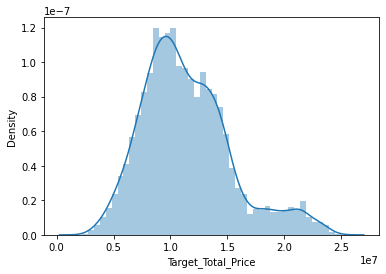

In [64]:
#his_list = ['Target_Total_Price','INT_SQFT','DIST_MAINROAD','House_age']
sns.distplot(df.Target_Total_Price)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



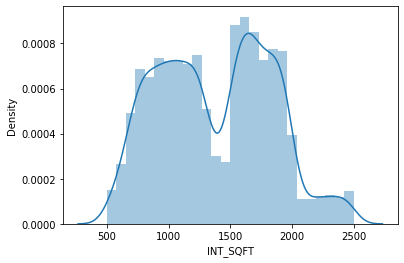

In [65]:
sns.distplot(df.INT_SQFT)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



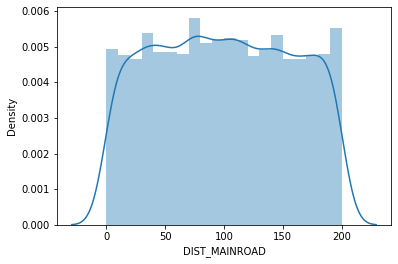

In [66]:
sns.distplot(df.DIST_MAINROAD)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



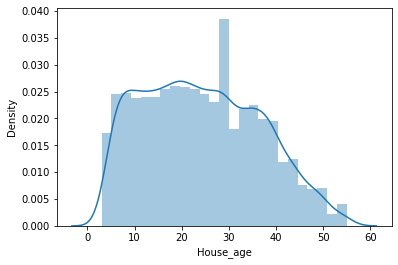

In [67]:
sns.distplot(df.House_age)

**Find the correlation using heatmap**

In [68]:
col = ['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age']
for i in range(len(col)):
    z = df[[col[i],'Target_Total_Price']].corr()
    fig = px.imshow(z, text_auto=True, aspect="auto")
    fig.show()

In [69]:
df.corr()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,House_age,Target_Total_Price
AREA,1.000000,0.295982,-0.004185,0.304617,0.010051,0.328047,-0.001632,-0.007065,-0.016797,0.025419,-0.117063,0.339613,-0.182476,0.354647
INT_SQFT,0.295982,1.000000,0.002022,0.786263,0.515290,0.951279,0.011033,-0.004618,-0.009084,0.014694,-0.100106,0.143226,-0.012610,0.620010
DIST_MAINROAD,-0.004185,0.002022,1.000000,-0.002723,0.001850,0.002301,-0.005010,0.009448,-0.023924,0.003075,-0.013666,0.007334,-0.003559,0.018584
N_BEDROOM,0.304617,0.786263,-0.002723,1.000000,0.755207,0.840209,0.016723,0.009357,0.003155,0.018621,-0.120624,0.049928,-0.045873,0.341300
N_BATHROOM,0.010051,0.515290,0.001850,0.755207,1.000000,0.568541,0.012457,0.014033,0.014043,0.020080,-0.061310,-0.047164,-0.020403,0.118533
N_ROOM,0.328047,0.951279,0.002301,0.840209,0.568541,1.000000,0.010721,0.000934,-0.008122,0.016157,-0.089727,0.163697,-0.033316,0.609345
SALE_COND,-0.001632,0.011033,-0.005010,0.016723,0.012457,0.010721,1.000000,0.009020,0.004867,0.009585,0.000334,0.023724,0.002685,0.023501
PARK_FACIL,-0.007065,-0.004618,0.009448,0.009357,0.014033,0.000934,0.009020,1.000000,0.012029,-0.004047,0.007024,0.007192,0.009010,-0.146908
BUILDTYPE,-0.016797,-0.009084,-0.023924,0.003155,0.014043,-0.008122,0.004867,0.012029,1.000000,0.013079,0.016744,-0.004869,0.011893,-0.516209
UTILITY_AVAIL,0.025419,0.014694,0.003075,0.018621,0.020080,0.016157,0.009585,-0.004047,0.013079,1.000000,-0.027651,0.012343,-0.000200,-0.023239


In [70]:
z = df.corr()
fig = px.imshow(z, text_auto=True, aspect="auto")
fig.show()

**Data Splitting**

In [71]:
X = df[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age']].values # features as arrays
y = df['Target_Total_Price'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 777)

In [72]:
r2_value = []
cross_vali = []

**Model training**

**LinearRegression**

In [73]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [74]:
LinearRegression()

LinearRegression()

In [75]:
coeff_df = pd.DataFrame(regressor.coef_,['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'], columns=['Coefficient'])
coeff_df['Coefficient']

AREA             1.597681e+05
INT_SQFT         3.331696e+03
DIST_MAINROAD    3.377480e+02
N_BEDROOM       -2.120053e+06
N_BATHROOM      -5.638900e+05
N_ROOM           2.174982e+06
SALE_COND        5.417080e+04
PARK_FACIL      -1.079039e+06
BUILDTYPE       -2.419803e+06
UTILITY_AVAIL   -1.362273e+05
STREET          -2.147234e+05
MZZONE           6.809126e+05
House_age       -2.091740e+04
Name: Coefficient, dtype: float64

In [76]:
regressor.intercept_

3960222.370094654

In [77]:
y_pred = regressor.predict(X_test)

In [78]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3


,Actual,Predicted
0,6896799,9.885084e+06
1,11776523,1.395232e+07
2,11046001,1.096049e+07
3,14464934,1.315328e+07
4,9429200,1.143438e+07
...,...,...
1417,8733272,1.046117e+07
1418,12814557,1.379616e+07
1419,8906756,1.083894e+07
1420,12453934,1.302258e+07


In [79]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred)) # 0 - 1
r2_value.append(metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 1159883.9224651912
Mean Squared Error: 2197041974083.5557
R2- SCORE: 0.857123401905353


**Feature Selection (Linear Regression)**

**RFE**

In [80]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'],selector.support_))

[('AREA', False),
 ('INT_SQFT', False),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', True),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('House_age', False)]

**Sequential Feature selection (Linear Regression)**

In [81]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'],sfs.get_support())))

[('AREA', False), ('INT_SQFT', True), ('DIST_MAINROAD', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('SALE_COND', False), ('PARK_FACIL', False), ('BUILDTYPE', True), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('House_age', False)]


**Cross Validation (Linear Regression)**

In [82]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

In [83]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(Standar

0.8544411471720531

**Ridge Regression**

In [84]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso, Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Ridge(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, X, y, cv=5, scoring = "r2" , return_train_score=True)
  print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())

Alpha :  0.001 0.8549426794403392 0.8556977556254524
Alpha :  0.002 0.8549310051968375 0.8556858280502115
Alpha :  0.003 0.8549119639935044 0.855666583307193
Alpha :  0.005 0.8548536022925564 0.8556079480314498
Alpha :  0.01 0.8546066780177632 0.8553609682610818
Alpha :  0.02 0.8537895455015239 0.8545454764936276
Alpha :  0.03 0.8526752627709021 0.8534340690822246
Alpha :  0.04 0.851358142233712 0.8521203543065594
Alpha :  0.1 0.8413115239023126 0.8420938142015277
Alpha :  0.2 0.8215262267631406 0.822330652942377
Alpha :  0.5 0.7593399808469234 0.7601724126530611
Alpha :  1 0.6686623589659964 0.6694926299249925


**KNN**

In [85]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [86]:
y_pred = neigh.predict(X_test)

In [87]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
0,6896799,9884054.0
1,11776523,12862576.5
2,11046001,15623393.5
3,14464934,14400410.5
4,9429200,17370276.0
...,...,...
1417,8733272,13411646.0
1418,12814557,12232813.0
1419,8906756,15748656.5
1420,12453934,11559792.0


In [88]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred)) # 0 - 1
r2_value.append(metrics.r2_score(y_test,y_pred))


Mean Absolute Error: 2694887.640295359
Mean Squared Error: 11794931561037.84
R2- SCORE: 0.23295971762067924


**Sequential Feature selection (KNN Regression)**

In [89]:
estimator = KNeighborsRegressor(n_neighbors=2)
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'],sfs.get_support())))

[('AREA', True), ('INT_SQFT', False), ('DIST_MAINROAD', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('SALE_COND', False), ('PARK_FACIL', False), ('BUILDTYPE', True), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('House_age', False)]


**Cross Validation (KNN Regression)**

In [90]:
KNReg = KNeighborsRegressor(n_neighbors=2) #untrained model

In [91]:
cv_results = cross_validate(KNReg, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.19346586735369037

**Random Forest**

In [92]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [93]:
y_pred = regr.predict(X_test)

In [94]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
0,6896799,8.296835e+06
1,11776523,1.183950e+07
2,11046001,1.183950e+07
3,14464934,1.183950e+07
4,9429200,1.183950e+07
...,...,...
1417,8733272,1.183950e+07
1418,12814557,1.183950e+07
1419,8906756,8.296835e+06
1420,12453934,8.296835e+06


**Feature Selection (Random Forest)**

**RFE**

In [95]:
estimator = RandomForestRegressor(max_depth=2, random_state=0)
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'],selector.support_))

[('AREA', False),
 ('INT_SQFT', True),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('House_age', True)]

**Sequential Feature selection (Random Forest)**

In [96]:
estimator = RandomForestRegressor(max_depth=2, random_state=0)
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'],sfs.get_support())))

[('AREA', False), ('INT_SQFT', True), ('DIST_MAINROAD', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('SALE_COND', False), ('PARK_FACIL', False), ('BUILDTYPE', True), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('House_age', False)]


**Cross Validation (Random Forest)**

In [97]:
ranfor = RandomForestRegressor(max_depth=2, random_state=0) #untrained model

In [98]:
cv_results = cross_validate(ranfor, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()


0.6306359840254943

**Decision Tree**

In [99]:
from sklearn.tree import DecisionTreeRegressor 
deci_regressor = DecisionTreeRegressor(random_state = 0) 
deci_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [100]:
y_pred = deci_regressor.predict(X_test)

In [101]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
0,6896799,7295414.0
1,11776523,12410049.0
2,11046001,11392695.0
3,14464934,13921614.0
4,9429200,10046285.0
...,...,...
1417,8733272,7489941.0
1418,12814557,13637317.0
1419,8906756,8581284.0
1420,12453934,12018100.0


In [102]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred)) # 0 - 1
r2_value.append(metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 575339.6708860759
Mean Squared Error: 578780690069.775
R2- SCORE: 0.9623611123430923


**Feature Selection (Decision Tree)**

**RFE**

In [103]:
estimator = DecisionTreeRegressor(random_state = 0) 
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'],selector.support_))

[('AREA', False),
 ('INT_SQFT', True),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('BUILDTYPE', True),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', True),
 ('House_age', False)]

**Sequential Feature selection (Decision Tree)**

In [104]:
estimator = DecisionTreeRegressor(random_state = 0) 
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
print(list(zip(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'House_age'],sfs.get_support())))

[('AREA', True), ('INT_SQFT', False), ('DIST_MAINROAD', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('SALE_COND', False), ('PARK_FACIL', False), ('BUILDTYPE', True), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', False), ('House_age', False)]


**Cross Validation (Decision Tree)**

In [105]:
detree = DecisionTreeRegressor(random_state = 0) #untrained model

In [106]:
cv_results = cross_validate(detree, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.9678641495952105

**Conclusion**

In [107]:
result = {'R2 Score' : r2_value,'Cross Validation Mean Score':cross_vali}
ind = ['Linear Regression','KNN','Random Forest','Decision Tree']
df_result = pd.DataFrame(result, index=ind)
df_result

ValueError: ignored

From the above comparison table, we have concluded that the Decision Tree is the best model for predicting the price of the house.

**Save Model To a File Using Python Pickle**

In [108]:
import pickle

In [109]:
# dumping the decision tree model
with open('model_pickle','wb') as file:
    pickle.dump(deci_regressor,file)

**Load Saved Model**

In [110]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

In [111]:
# AREA           : {'Karapakkam':0, 'Anna Nagar':1, 'Adayar':2, 'Velachery':3, 'Chrompet':4,'KK Nagar':5, 'T Nagar':6}
# INT_SQFT       : Eg : 1500
# DIST_MAINROAD  : Eg : 200
# N_BEDROOM      : Eg : 2
# N_BATHROOM     : Eg : 1
# N_ROOM         : Eg : 3
# SALE_COND      : {'AbNormal':0, 'Family':1, 'Partial':2, 'AdjLand':3, 'Normal Sale':4}
# PARK_FACIL     : {'Yes':0,'No':1}
# BUILDTYPE      : {'Commercial':0, 'Others':1, 'House':2}
# UTILITY_AVAIL  : {'AllPub':0, 'ELO':1, 'NoSeWa':2}
# STREET         : {'Paved':0, 'Gravel':1, 'NoAccess':2}
# MZZONE         : {'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5}
# House_age      : Eg : 25
## Target_Total_Price --> Price of the house will get as the result value

In [112]:
house_price = mp.predict([[0,2500,200,2,1,4,1,0,2,0,0,1,20]])
print("The price of the house with given details is",house_price[0])

The price of the house with given details is 9445011.0
